In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import seaborn as sns

# Some plotting config
sns.set(
    context="notebook",
    # style="ticks",
    style="darkgrid",
    font="Times New Roman",
    font_scale=1.5,
)

sns.color_palette("mako", as_cmap=True)
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
# plt.rcParams["xtick.top"] = True
# plt.rcParams["ytick.right"] = True
# plt.rcParams["xtick.bottom"] = True
# plt.rcParams["ytick.left"] = True
plt.rcParams["mathtext.fontset"] = "cm"

from tqdm.auto import tqdm, trange

import numpy as np
import scipy as sp
import astropy.units as u
import astropy.constants as const

In [2]:
import ezmist

In [3]:
data = ezmist.get_one_isochrone(
    age=11.75e9,
    FeH=-1.0,
    v_div_vcrit=0.0,
    age_scale="linear",
    output_option="photometry",
    output="UBVRIplus",
).to_pandas()

data_47T = ezmist.get_one_isochrone(
    age=11.75e9,
    FeH=-0.7,
    v_div_vcrit=0.0,
    age_scale="linear",
    output_option="photometry",
    output="UBVRIplus",
).to_pandas()

Interrogating http://waps.cfa.harvard.edu/MIST/iso_form.php...
Request...done.
Reading content...done.
b"PK\x03\x04\x14\x00\x00\x00\x08\x00BO,T\xaa\xcc\xe9NT\xb1\x03\x00\x94\xc6\x10\x00\x1e\x00\x00\x00MIST_iso_61deec76b0abb.iso.cmd\xbc\xfdm\xaf\xf4\xed\x9a\xdc\x07\xbd\xe7Sl\x897 \xb2\xef\x9c\xcf\x0fH\xbcH\x88!!X\x8a\xec\x10\x04\x08\x8d\x06k'\x19\xc9\xf1" <class 'bytes'> b'PK\x03\x04\x14\x00\x00\x00\x08\x00'
decompressing archive (type=zip)...done.
Interrogating http://waps.cfa.harvard.edu/MIST/iso_form.php...
Request...done.
Reading content...done.
b'PK\x03\x04\x14\x00\x00\x00\x08\x00EO,T\xd55i\xf6\x7f\xa3\x03\x00\x94\xc6\x10\x00\x1e\x00\x00\x00MIST_iso_61deec7d88ce5.iso.cmd\xbc\xfd[\xaf\xf4mz\xdc\x87\x9d\xfbS\x0c\xe0\x13\x07\xf1\xbc\xbe\xf7\x9b\x00>\xb0cy\x13G\x80!\xd9\x0e\x92  \x18al\x13\x90' <class 'bytes'> b'PK\x03\x04\x14\x00\x00\x00\x08\x00'
decompressing archive (type=zip)...done.


In [4]:
data.head()

,index,EEP,isochrone_age_yr,initial_mass,star_mass,log_Teff,log_g,log_L,[Fe/H]_init,[Fe/H],...,Gaia_RP_DR2Rev,Gaia_G_MAW,Gaia_BP_MAWb,Gaia_BP_MAWf,Gaia_RP_MAW,TESS,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,phase
0,0,248,1.175000e+10,0.102747,0.102746,3.528909,5.318767,-2.800666,-1.0,-0.974699,...,11.450295,12.467991,13.633671,13.681005,11.430095,11.401742,12.487710,13.659501,11.431408,0.0
1,1,249,1.175000e+10,0.104865,0.104864,3.530420,5.312440,-2.780840,-1.0,-0.974624,...,11.392515,12.404172,13.557026,13.604468,11.372359,11.344816,12.423918,13.582301,11.373856,0.0
2,2,250,1.175000e+10,0.108173,0.108171,3.532781,5.302545,-2.749851,-1.0,-0.974487,...,11.302719,12.305181,13.438871,13.486382,11.282628,11.256311,12.324969,13.463352,11.284404,0.0
3,3,251,1.175000e+10,0.111348,0.111346,3.535047,5.293040,-2.720099,-1.0,-0.974359,...,11.217209,12.211172,13.329344,13.376916,11.197176,11.171984,12.230998,13.353148,11.199208,0.0
4,4,252,1.175000e+10,0.114524,0.114523,3.537314,5.283519,-2.690325,-1.0,-0.974208,...,11.132787,12.118163,13.220081,13.267818,11.112779,11.088313,12.138022,13.243434,11.115009,0.0


In [5]:
data.shape

(1463, 35)

In [6]:
data.columns

Index(['index', 'EEP', 'isochrone_age_yr', 'initial_mass', 'star_mass',
       'log_Teff', 'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U',
       'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I', '2MASS_J',
       '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 'Hipparcos_Hp',
       'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev',
       'Gaia_RP_DR2Rev', 'Gaia_G_MAW', 'Gaia_BP_MAWb', 'Gaia_BP_MAWf',
       'Gaia_RP_MAW', 'TESS', 'Gaia_G_EDR3', 'Gaia_BP_EDR3', 'Gaia_RP_EDR3',
       'phase'],
      dtype='object')

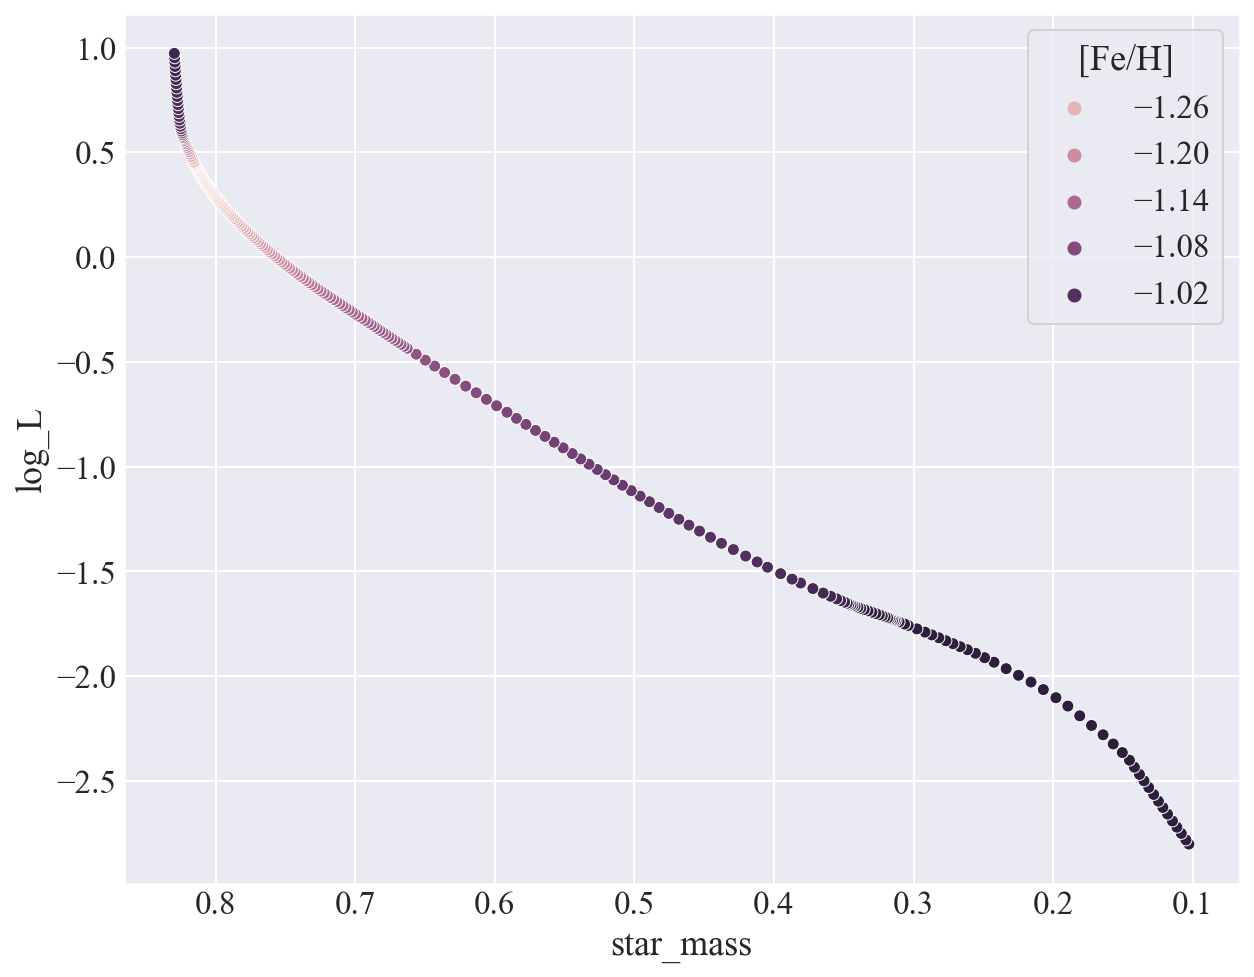

In [7]:
plt.figure()
# this is hacky but whatever
sns.scatterplot(data=data[0 : int(1463 / 6)], x="star_mass", y="log_L", hue="[Fe/H]")

plt.gca().invert_xaxis()

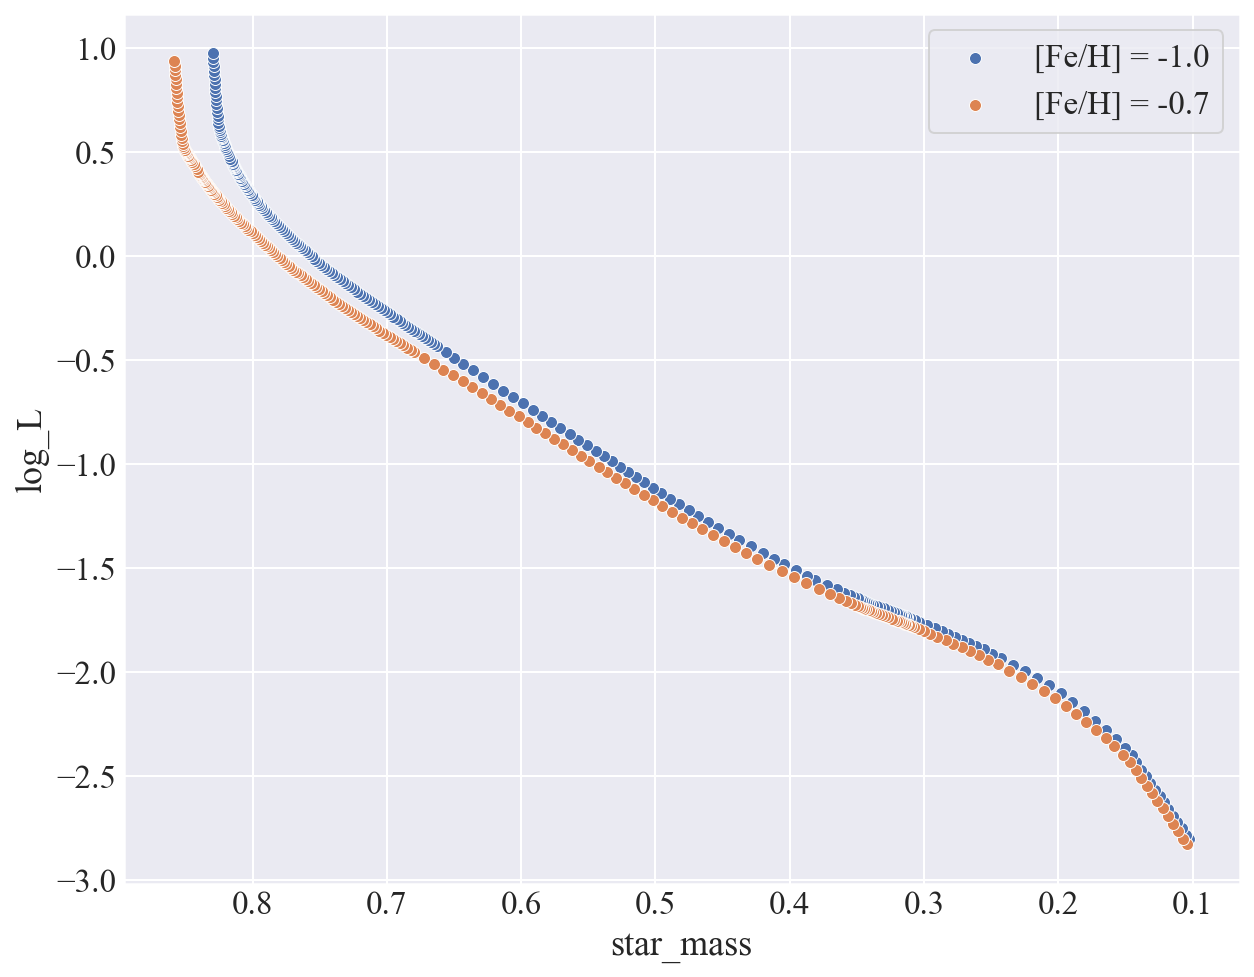

In [8]:
plt.figure()
# this is hacky but whatever
sns.scatterplot(
    data=data[0 : int(1463 / 6)], x="star_mass", y="log_L", label="[Fe/H] = -1.0"
)
sns.scatterplot(
    data=data_47T[0 : int(1463 / 6)], x="star_mass", y="log_L", label="[Fe/H] = -0.7"
)

plt.gca().invert_xaxis()

It looks like if we only consider main sequence stars (unclear if this is actually a good assumption) then we have easy relation between mass and luminosity. This would let us just add the luminosity of each binary component and get the observed mass of the binary system for scaling which would be nice. The vast majority of our star (and therefore our binary components) are main sequence stars, maybe this assumption is fine?

Looks like the difference between metallicity of $-0.7$ and $-1.0$ is really small for most of the main sequence, at the heavier end there's a bit of a difference but I don't think it's enough to worry about.

In [9]:
# I'm thinking just stick some splines on there each way for the conversions:

MS_isochrone = data[0 : int(1463 / 6)]

mass_to_lum = sp.interpolate.InterpolatedUnivariateSpline(
    x=MS_isochrone.star_mass, y=10 ** MS_isochrone.log_L, k=3, ext=2
)
lum_to_mass = sp.interpolate.InterpolatedUnivariateSpline(
    x=10 ** MS_isochrone.log_L, y=MS_isochrone.star_mass, k=3, ext=2
)

In [10]:
# example with a binary made of 0.5 and 0.6 msol stars

lum1 = mass_to_lum(0.5)
lum2 = mass_to_lum(0.6)

observed_mass = lum_to_mass(lum1 + lum2)
print(observed_mass)

0.6329242233862847


In [11]:
# seems pretty reasonable?

In [12]:
def get_observed_mass(mj, q):
    # first calculate the individual masses
    mb = mj/(1+q)
    ma = mj - mb
    # then get observed mass
    lum1 = mass_to_lum(ma)
    lum2 = mass_to_lum(mb)

    observed_mass = lum_to_mass(lum1 + lum2)
    return float(observed_mass)

In [13]:
get_observed_mass(mj=1,q=0.5)

0.6719197209578329

In [14]:
0.5/0.6

0.8333333333333334

In [15]:
get_observed_mass(mj=1.1,q=0.8333333333)

0.6329242233910841

In [16]:
# alright looks like its working

# when we implement this in the actual code base we need to implement caching of the isochrone
# so that we dont query with each model run